# **Rede Neural Artificial do Zero com Numpy**

Redes Neurais Artificiais são algorítimos computacionais inspirados no funcionamento do cerebro humano, em que sua menor estrutura é o perceptron, sua estrutura é simples, sendo composta por entradas que são multiplicadas por pesos (ganhos) e somado com número [vies (Bayas)], além disso o perceptron possui uma função de ativação, a figura abaixo mostra a estrutura de um perceptron.

<p align="center">
  <img src="https://starship-knowledge.com/wp-content/uploads/2020/10/Perceptrons-1024x724.jpeg"  style="height: 40%; width:40%;"/>
</p>

A partir dessa simples estrutura é possível criar algorítimos complexos que conseguem aproximar soluções não lineares, como, classificação de imagens, agrupamento de informações, tradução de textos entre muitas outras posssibilidades.

Lembrando que modelos complexos de redes neurais artificiais possuem minhões ou mesmo bilhões dessas estruturas interligadas.

<p align="center">
  <img src="https://www.researchgate.net/profile/Meriem-Bahi/publication/330120030/figure/fig1/AS:735637925797888@1552401157053/Deep-Neural-Network-architecture.ppm"  style="height: 70%; width:70%;"/>
</p>


---

## **Estrutura da Rede Neural que será Desenvolvida**

A rede neural terá três camadas, sendo a primeira a camada de entradas, a segunda a camada oculta e a terceira a camada de saída.

<p align="center">
  <img src="https://github.com/Oseiasdfarias/Rede_Neural_do_Zero_com_Numpy_AlgebraLinear/blob/main/utils/estrutura_rn.png?raw=true"  style="height: 70%; width:70%;"/>
</p>


### Camada de Entrada:

Essa camada recebe os pixels da imagem, cada imagem do conjunto de dados tem 28x28 pixels. ou seja, possui 784 pixels. Assim, a camada de entrada terá 784 entradas que corresponde ao número de pixels das imagens.

### Camada Oculta:
Para a camada oculta, vamos usar 10 neurônios, esse valor é arbitrário, foi usado para ficar melhor de entender a estrutura.

### Camada de Saída:
Para a camada de saída, deve ser usado 10 neurônios, pois como estamos trabalhando com um problema de classificação, cada neurônio da saída se refere a uma das classes, no caso do dataset MNIST, cada número é uma classe. iremos nos aprofundar melhor nessa parte mais a frente.

---

## **Base de Dados Para Treinar a Rede Neural**

O objetivo é criar uma Rede Neural para classificar dígitos manuscritos, vamos usar uma base de dados muito conhecida chamada MNIST, essa base de dados é composta por imagem dos números de 0 a 10.

<p align="center">
  <img src="https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset-1024x768.png"  style="height: 30%; width:30%;"/>
</p>

---

## **Pré-Processamento da Base de Dados**

### Importando as Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Carregando o Dataset MNIST

In [2]:
data = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(f"Estrutura dos Dados: {data.shape}")

Estrutura dos Dados: (60000, 785)


### Transformando o DataFrame Pandas em um array numpy e separando entre dados de Traino e Teste
Pré-processamento dos dados, comolando no formato correto para a rede neural

In [4]:
# Converte o DataFrame Pandas em um NumPy Array
data = np.array(data)
# Pega as dimensões do dataset
m, n = data.shape
# Embaralha as imagens
np.random.shuffle(data)

# Separando os dados de treinamento
data_test = data[0:1000].T
# Pegando a primeira coluna que são os rótulos, identifica o número
Y_test = data_test[0]
# Pixels que formam as imagens 
X_test = data_test[1:n]
# Normalizando os dados de teste.
X_test = X_test / 255.

# Dados de Treinamento
data_train = data[1000:m].T
# Pegando a primeira coluna que são os rótulos, identifica o número
Y_train = data_train[0]
# Pixels que formam as imagens
X_train = data_train[1:n]
# Normalizando os dados de teste.
X_train = X_train / 255.
_,m_train = X_train.shape

### Entradas para a Rede Neural
cada uma das imagens possuem 784 pixels, esses dados são as entradas da rede neural.

$$\begin{bmatrix}
    px_1\\
    px_2\\
    px_3\\
    \vdots\\
    px_{784}
\end{bmatrix}$$

In [5]:
# Mostando a estrutura dos dados de treino
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Pixels de uma imagem

In [6]:
# uma amostra, com o seu rótulo respectivo.
print(f"\nNúmero: {Y_train[0]}")
print("\n\nPixels")
X_train[:, 0]


Número: 8


Pixels


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Plotando algumas amostras com o auxílio do Matplotlib

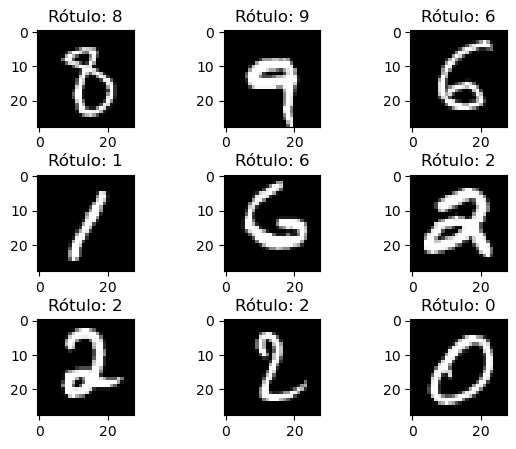

In [7]:
plt.figure(figsize=(7, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.title(f"Rótulo: {Y_train[i]}")
    # Coloca os pixels no formato 28x28 da imagem original do número
    numero = X_train[:, i].reshape((28, 28))
    # gera uma imagens com os dados dos pixels
    plt.imshow(numero, cmap=plt.get_cmap('gray'))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

---

## **Codificando a Rede Neural Artificial**

#### Inicializando os Parâmetros da Rede Neural
Como dito no início, uma rede neural é composta por estruturas menores chamadas perceptrons, cada perceptron possui pesos e bayes para cada entrada que se conecta a ele, dessa forma, para o modelo desenvolvido nesse notebook, cada perceptron terá 784 pesos (um para cada entrada) e um Bayes.


Onde:
> + w1 : Pesos da primeira camada, é um array contendo todos os pesos para os percptrons da primeira camada.
> + b1 : São os Bayes dos perceptrons da primeira camada, também chamada de Camada de entrada
> + w2 : Pesos da segunda camada, é um array contendo todos os pesos para os percptrons da segunda camada.
> + b2 : São os Bayes dos perceptrons da segunda camada, também chamada de Camada Oculta.

In [8]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

#### Funções de Ativação ReLu e Softmax

In [9]:
# Função de Ativação ReLu.
def relu(z):
    # Verifica para cada elemento do array se é maior que zero, 
    # caso seja, retorna o próprio valor, caso não, retorna zero.
    return np.maximum(z, 0)

# Derivada da Função de Ativação ReLu.
def deriv_relu(z):
    return z > 0

# Função de Ativação Softmax, retorna a probabilidade da classificação esta correta.
def softmax(z):
    return np.exp(z) / (sum(np.exp(z)))

#### Propagação direta (feedforward)

In [10]:
# Propagação Direta
def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

#### Codificando os rótulos, (one hot encoder)
esse passo é necessário para transformar os rótulos na estrutura necessária para a rede neural poder funcionar corretamente

In [11]:
# Codifica os rótulos em uma estrutura binária
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T
    
    # Teste
one_hot(np.array([0, 1, 2, 3, 4]).T)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

#### Propagação Inversa

In [12]:
def back_prop(z1, a1, z2, a2, w1, w2, x, y):
    m = y.size
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deriv_relu(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2

### Atualização dos Parâmetros da rede neural
Realiza a atualização dos pesos da rede neural, o objetivo é encontrar pesos que aproxime as entradas aos rótulos,
essa estrutura é chamada de aprendizado supervisionado, pois para a rede neural aprender, deve ter uma base de dados com
as respostas corretas, assim ela pode comparar sua resposta com as respostas corretas até conseguir obter uma aproximação.

In [13]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

### Descida do Gradiente da Rede Neural
Função responsável pelo treinamento da rede neural, esse processo é feito em um loop em que a rede vai aprendendo com os dados,
para acompanhar o processo de aprendizagem da rede é usado a métrica de acurácia, o quando a rede acertou quando previu toda a base de dados.

In [14]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(x, y, lr, iterations):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w1, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, lr)
        if ( i% 10 == 0):
            print(f"Iteração: {i}")
            predictons = get_predictions(a2)
            print(f"Acurácia: {get_accuracy(predictons, y)}")
    return w1, b1, w2, b2

### Treinamento do Modelo

In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteração: 0
[6 4 2 ... 2 6 4] [8 9 6 ... 7 2 7]
Acurácia: 0.10879661016949152
Iteração: 10
[8 6 9 ... 9 6 4] [8 9 6 ... 7 2 7]
Acurácia: 0.15310169491525424
Iteração: 20
[8 6 8 ... 9 3 7] [8 9 6 ... 7 2 7]
Acurácia: 0.2101864406779661
Iteração: 30
[8 6 8 ... 9 3 7] [8 9 6 ... 7 2 7]
Acurácia: 0.2536779661016949
Iteração: 40
[8 4 8 ... 9 3 7] [8 9 6 ... 7 2 7]
Acurácia: 0.296406779661017
Iteração: 50
[8 4 0 ... 9 3 7] [8 9 6 ... 7 2 7]
Acurácia: 0.3389491525423729
Iteração: 60
[8 4 0 ... 9 3 7] [8 9 6 ... 7 2 7]
Acurácia: 0.3783728813559322
Iteração: 70
[8 4 0 ... 9 3 7] [8 9 6 ... 7 2 7]
Acurácia: 0.4152033898305085
Iteração: 80
[8 4 0 ... 9 3 7] [8 9 6 ... 7 2 7]
Acurácia: 0.457271186440678
Iteração: 90
[1 4 0 ... 9 3 7] [8 9 6 ... 7 2 7]
Acurácia: 0.5017627118644068
Iteração: 100
[1 4 0 ... 9 3 7] [8 9 6 ... 7 2 7]
Acurácia: 0.5395254237288135
Iteração: 110
[1 4 0 ... 7 3 7] [8 9 6 ... 7 2 7]
Acurácia: 0.5726610169491525
Iteração: 120
[1 4 6 ... 7 3 7] [8 9 6 ... 7 2 7]
Acurácia: 0.6

---

## **Teste do Modelo treinado e Visualização das previsões**

In [16]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    plt.figure(figsize=(7, 5))
    for i in range(9):
        current_image = X_train[:, index[i], None]
        prediction = make_predictions(X_train[:, index[i], None], w1, b1, w2, b2)
        label = Y_train[index[i]]
        print("Prediction: ", prediction)
        print("Label: ", label)

        plt.subplot(330 + 1 + i)
        plt.title(f"Rótulo: {label}")
        # Coloca os pixels no formato 28x28 da imagem original do número
        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        # gera uma imagens com os dados dos pixels
        plt.imshow(current_image, interpolation='nearest')
        
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    plt.show()

Prediction:  [2]
Label:  2
Prediction:  [2]
Label:  2
Prediction:  [9]
Label:  9
Prediction:  [9]
Label:  9
Prediction:  [3]
Label:  3
Prediction:  [3]
Label:  3
Prediction:  [2]
Label:  2
Prediction:  [9]
Label:  9
Prediction:  [7]
Label:  7


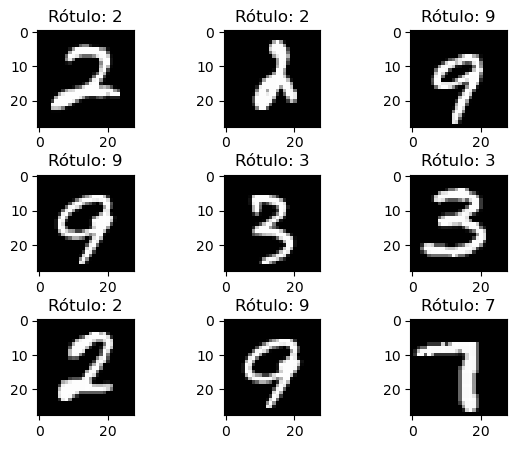

In [17]:
testes = np.random.randint(Y_test.shape[0], size=(9))
test_prediction(testes, W1, b1, W2, b2)


Prediction:  [2]
Label:  2
Prediction:  [3]
Label:  3
Prediction:  [4]
Label:  4
Prediction:  [2]
Label:  2
Prediction:  [8]
Label:  5
Prediction:  [7]
Label:  9
Prediction:  [1]
Label:  8
Prediction:  [4]
Label:  6
Prediction:  [3]
Label:  3


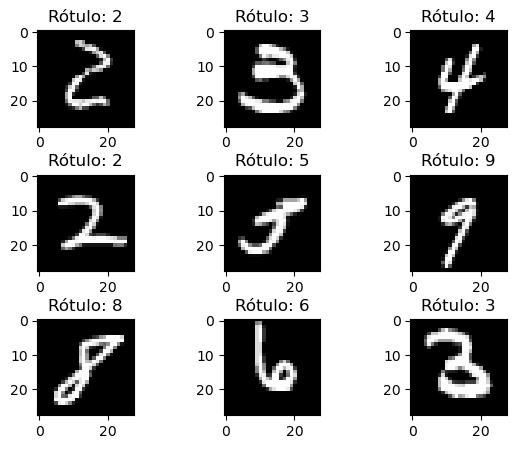

In [18]:
testes = np.random.randint(Y_test.shape[0], size=(9))
test_prediction(testes, W1, b1, W2, b2)

Por fim, vamos encontrar a precisão no conjunto de dados de teste:

In [19]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[2 1 8 6 7 1 5 6 5 7 4 8 1 9 4 7 4 0 7 7 1 9 2 1 2 0 2 4 6 6 5 9 2 6 7 1 8
 3 2 9 3 6 2 7 0 1 1 8 4 8 0 7 4 5 4 2 3 9 1 2 8 7 1 1 0 0 5 0 6 6 6 9 3 8
 1 2 1 8 4 8 3 2 9 9 3 1 3 1 3 7 6 0 3 9 2 4 4 1 2 2 3 7 2 1 9 1 7 6 1 9 5
 7 7 7 8 0 6 0 0 9 7 3 7 3 0 0 8 3 0 7 3 6 4 4 6 7 2 3 2 8 2 6 6 4 6 2 0 4
 9 4 1 1 7 0 6 5 5 8 8 8 2 3 0 7 1 3 4 6 2 3 2 8 8 4 0 5 3 0 3 9 1 2 0 2 1
 5 5 1 7 3 4 0 0 8 8 4 4 3 5 5 4 2 9 5 4 0 3 7 8 3 0 7 9 9 5 3 0 0 5 5 2 6
 0 7 2 2 9 0 4 8 8 9 8 9 3 4 5 3 3 5 4 1 6 0 3 8 7 6 0 2 2 1 7 9 8 3 3 5 5
 3 3 7 6 9 6 4 4 5 3 1 2 9 5 8 0 8 5 5 5 9 7 7 3 7 9 2 2 7 3 8 8 5 6 2 0 2
 7 7 9 0 4 0 7 9 9 0 0 2 8 3 7 5 4 6 7 8 0 3 5 6 1 5 1 4 9 3 5 1 4 6 8 7 8
 3 0 1 2 3 9 8 3 1 0 8 0 0 0 2 9 0 2 0 7 2 0 5 1 8 8 0 0 1 9 3 5 0 7 4 8 4
 9 9 3 4 7 3 8 5 1 7 0 6 0 0 8 3 6 7 5 2 8 5 2 1 7 9 0 2 7 9 0 7 8 4 9 4 4
 5 6 1 8 8 6 1 3 7 0 0 0 3 7 8 1 5 6 8 3 8 9 6 7 7 3 3 8 0 6 3 2 2 9 4 0 1
 0 3 8 9 0 3 9 9 3 4 0 8 6 5 6 1 3 8 2 1 7 6 0 4 8 1 0 0 8 2 1 0 7 9 0 5 4
 1 1 1 0 0 7 3 4 5 3 6 1 

0.865

Mesmo com os dados que não foram usados para treinar o modelo, ainda assim o modelo tem 85,3% de precisão, Dessa forma, podemos afirmar que o modelo não sofreu Overfitting. então nosso modelo generalizou muito bem a partir dos dados de treinamento.